In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 233 p

In [3]:
mean = 175
std = 5
x = 180

prob = stats.norm.cdf(x, mean, std) #cdf = 누적분포함수, 평균이 mean, 표준편차가 std일때 정규분포에서 x까지의 누적확률을 반환
print(round((1-prob)*100,1),"%") 

15.9 %


평균이 175cm, 표준편차가 5cm일때 180cm의 키는 정규분포의 가운데에서 표준편차만큼 떨어진 곳의 바깥 부분 면적과 같으므로 1-(180cm까지의 누적확률)이다. 
이에 따라 15.9%이다. 

#### 235 p

In [4]:
mean = 12
std = 3
x = 15
prob = stats.norm.cdf(x, mean, std)
print("1:",round(abs((1-2*prob)*100),1),"%")
print("2:",round((1-prob)*100,1),"%")

1: 68.3 %
2: 15.9 %


1. 평균이 12km, 표준편차가 3km일때 9km 이상 15km 이하는 정규분포에서 -1표준편차부터 +1표준편차까지의 넓이이므로 68.2%(68.3%)이다.
2. 15km이상일 경우, 1-(15km까지의 누적확률)일 경우 15.9%이다.                                  


#### 241 p

In [5]:
t = 2.0
df = 100
prob = stats.t.cdf(t, df)
print("P (T ≤ t) :",round(prob,3))

P (T ≤ t) : 0.976


#### 244 p

In [6]:
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq,df)
print("p(x ≤ 3.0):", round(prob,4))

p(x ≤ 3.0): 0.0656


#### 247 p

In [7]:
prob = stats.f.cdf(1.5, 10,100)
print("P(X<=F):", round(prob,3))

P(X<=F): 0.85


#### 253 p

In [8]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3)
    print(f"P(X={i}):{prob.round(3)}")

P(X=0):0.168
P(X=1):0.36
P(X=2):0.309
P(X=3):0.132
P(X=4):0.028
P(X=5):0.002


#### 269 p

In [9]:
data = pd.read_csv("../01.files/01.Bigdata_basic/2sample_t_test.csv")
data

,Mat_A,Mat_B
0,73.4,68.7
1,77.0,71.4
2,73.7,69.8
3,73.3,75.3
4,73.1,71.3
5,71.5,72.7
6,74.5,66.9
7,77.5,70.2
8,76.4,74.4
9,77.7,70.1


In [10]:
statistic, p = stats.shapiro(data['Mat_A'])
print(round(statistic, 3), round(p, 3))
# 정규성 검정 필요

statistic, p = stats.shapiro(data['Mat_B'])
print(round(statistic, 3), round(p, 3))

0.906 0.256
0.973 0.917


#### 272 p

In [11]:
df_potato = pd.DataFrame({'w':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
lower, upper = stats.norm.interval(0.95, loc = np.mean(df_potato), scale = 3.8/np.sqrt(20))
print(f"신뢰구간:{lower.round(2)},{upper.round(2)}")

신뢰구간:[17.83],[21.17]


#### 275 p

In [12]:
df_data = pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
len(df_data)

20

In [13]:
stats.sem(df_data)

array([0.43225236])

In [14]:
lower, upper = stats.t.interval(0.95, len(df_data)-1, loc = np.mean(df_data), scale = stats.sem(df_data))
print("신뢰구간:", lower.round(2), upper.round(2))

신뢰구간: [70.6] [72.4]


#### 299

In [15]:
# H0: 변화가 없다.
# H1: 변화가 있다. 

df_data = pd.DataFrame({'satisfy' : [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
statistic, p = stats.shapiro(df_data['satisfy'])
print(round(statistic, 3), round(p, 3))

t_result = stats.ttest_1samp(df_data, 78.0)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("통계량:",t)
print("P-value:", p)

0.847 0.054
통계량: [3.379]
P-value: [0.008]


p-value가 0.05보다 낮으므로, 만족도의 변화가 있다고 분석된다.

<Axes: >

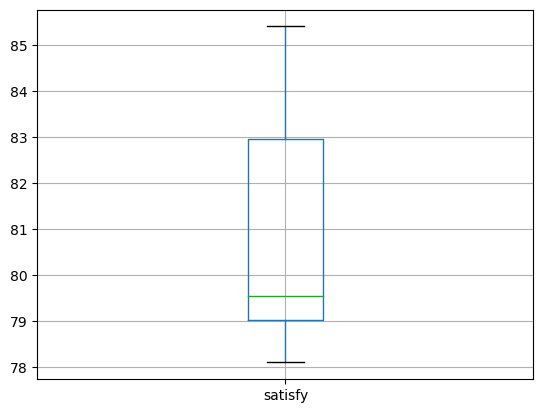

In [16]:
df_data.boxplot()

#### 302 p

In [17]:
# H0: 차이가 없다.
# H1: 차이가 있다.
df_data = pd.DataFrame({'Supplier' : ['B','B','B','A','A','A','B','B','B','A','A','A','A','A','B','B'],
                       'Thickness' : [1.435, 1.572, 1.486,1.883, 1.715, 1.799, 1.511, 1.457, 1.548, 1.768, 1.711, 1.832, 1.427, 1.344, 1.404, 1.800]})

df_A = df_data[df_data['Supplier'] == 'A']
df_B = df_data[df_data['Supplier'] == 'B']

In [18]:
statistic, p = stats.shapiro(df_A['Thickness'])
print(round(statistic, 3), round(p, 3))

statistic, p = stats.shapiro(df_B['Thickness'])
print(round(statistic, 3), round(p, 3))

stats.bartlett(df_A['Thickness'],df_B['Thickness'])

0.843 0.08
0.839 0.074


BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

In [19]:
t_result = stats.ttest_ind(df_A['Thickness'],df_B['Thickness'])

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print( " 2-Sample t-test ")
print( "  t검정통계량: {} " .format(t)) ; print( " p-value : {} " .format(p))

 2-Sample t-test 
  t검정통계량: 1.94 
 p-value : 0.073 


p-value가 0.05보다 높으므로, 차이가 없다고 볼 수 있다. 

#### 305 p

In [20]:
# H0: 차이가 없다
# H1: 차이가 있다.

df_data = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648],
                       'after':[710,580,787,712,750,600,782,670,790,680]})
t_result = stats.ttest_rel(df_data['before'], df_data['after'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: -2.266 
 p: 0.05 


p-value가 0.05이므로 귀무가설이 기각됨에 따라 차이가 있다. 

#### 310 p

In [21]:
# H0: 정상이다.
# H1: 비정상이다.

count = 40
n_obs = 100
value = 0.5

z, p = proportions_ztest(count, n_obs, value)

print( "1 Proportion test")
print( ' z: {0:0.3f}' .format(statistic))
print( ' p: {0:0.3f}'.format(p))

1 Proportion test
 z: 0.839
 p: 0.041


p-value가 0.05보다 작으므로 비정상임을 알 수 있다. 

#### 313 p

In [23]:
# H0: p1 = p2
# H1: p1 != p2

count = np.array([12,5])
nobs = np.array([1200,1200])

z, p = proportions_ztest(count, nobs)
print( "2 Proportion test")
print( ' z: {0:0.3f}' .format(statistic))
print( ' p: {0:0.3f}'.format(p))

2 Proportion test
 z: 0.839
 p: 0.088


p-value가 0.05보다 크므로, 두 공장의 불량률에 차이가 없음을 알 수 있다. 

#### 321 p

In [24]:
# H0: 각 제품에 대한 이미지 차이가 없다
# H1: 각 제품에 대한 이미지 차이가 있다. 

df_data = pd.DataFrame({
    'A':[18,1,8,7,10,9,10],
    'B':[8,2,14,5,5,9,4],
    'C':[4,1,3,4,9,5,4],
    'D':[4,1,2,3,2,7,3],
    'E':[3,1,3,1,1,1,1],
    'F':[3,25,8,10,2,1,7]
})
chi, pval, dof, expected = stats.chi2_contingency(df_data)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.4f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 98.27
 p-value : 0.0000
 degree of freedom: 30
 expected value: 
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]


유의수준 0.5%에서 p-value는 그보다 낮으므로, 각 제품에 대하여 이미지 차이가 있다고 할 수 있다. 

#### 328 p

In [25]:
# H0: 강종/type 별로 2차 정련 시간에 차이가 없다.
# H1: 강종/type 별로 2차 정련 시간에 차이가 있다.

df = pd.read_csv("../01.files/01.Bigdata_basic/ANOVA.csv")
df_t = pd.DataFrame({'a' : df[df['type']=='a']['time'].reset_index(drop=True),
                    'b': df[df['type']=='b']['time'].reset_index(drop=True)})
gangjong = df.groupby('gangjong')['time'].apply(list)

print("type 별")
statistic, p = stats.shapiro(df_t['a'])
print(f"statistic={statistic}, p-value={p}")

statistic, p = stats.shapiro(df_t['b'])
print(f"statistic={statistic}, p-value={p}")

print("\nGangjong 별")
for i in gangjong:
    statistic, p = stats.shapiro(i)
    print(f"statistic={statistic}, p-value={p}")

type 별
statistic=0.9821396890860578, p-value=0.9907690420937295
statistic=0.909827276366793, p-value=0.2122626774616082

Gangjong 별
statistic=0.9879402484638727, p-value=0.9835576371370772
statistic=0.9769708531514716, p-value=0.9355481069537137
statistic=0.8929418389400074, p-value=0.33388968261479385
statistic=0.9713903657895416, p-value=0.901640794517041


In [26]:
print(stats.bartlett(df_t['a'], df_t['b']))
print(stats.bartlett(gangjong['a'],gangjong['b'],gangjong['c'],gangjong['d']))

BartlettResult(statistic=0.9529700642151103, pvalue=0.3289644435379086)
BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)


Text(0.5, 1.0, 'gangjong Boxplot')

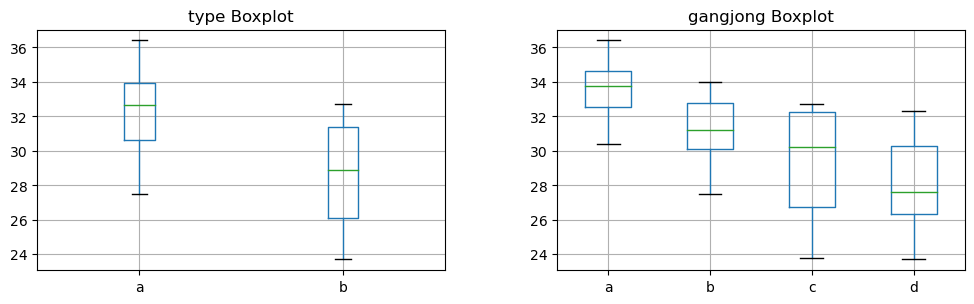

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.tight_layout(w_pad=5, h_pad=5)
df_g = pd.DataFrame({'a' : df[df['gangjong']=='a']['time'].reset_index(drop=True),
                    'b': df[df['gangjong']=='b']['time'].reset_index(drop=True),
                    'c': df[df['gangjong']=='c']['time'].reset_index(drop=True),
                    'd': df[df['gangjong']=='d']['time'].reset_index(drop=True)})

df_t.boxplot(ax=axes[0])
axes[0].set_title('type Boxplot')

df_g.boxplot(ax=axes[1])
axes[1].set_title('gangjong Boxplot')

In [28]:
gangjong

gangjong
a    [32.2, 30.4, 33.6, 36.4, 33.9, 34.9]
b    [33.1, 29.9, 31.7, 27.5, 34.0, 30.7]
c    [32.6, 32.7, 29.3, 25.9, 31.1, 23.8]
d    [26.7, 28.5, 30.9, 26.2, 32.3, 23.7]
Name: time, dtype: object

In [30]:
f_result = stats.f_oneway(df_t['a'], df_t['b'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ANOVA ")
print( f" F통계량 : {f} ")
print( f" p-value : {p} ")

One-way ANOVA 
 F통계량 : 9.654 
 p-value : 0.005 


In [31]:
f_result = stats.f_oneway(gangjong['a'],gangjong['b'],gangjong['c'],gangjong['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print( "One-way ANOVA ")
print( f" F통계량 : {f} ")
print( f" p-value : {p} ")

One-way ANOVA 
 F통계량 : 4.172 
 p-value : 0.019 


강종별, 타입별로 검정하였을 때 둘 다 p-value가 0.05보다 낮기 때문에, 둘다 2차정련 시간에 차이가 있음을 보인다. 

#### 333p

In [32]:
df = pd.DataFrame({
    'Strength' :[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5 ],
    'Temperature' : [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]
})

corr, pval = stats.pearsonr(df['Strength'], df['Temperature'])

print( "Correlation Analysis ")
print( f' corr: {corr}')
print( f' p-value : {pval}')

Correlation Analysis 
 corr: -0.723107314935157
 p-value : 0.0003152005510027819


상관계수의 경우 0보다 작으며(음), p-value가 0.05보다 낮으므로 유의미한 결과가 있으며, 둘은 강한 음의 선형관계를 가지고 있음을 알 수 있다.